# Principal Component Analysis
In this notebook, we explore Principal Component Analysis with the famous Olivetti Faces data set.

## Understanding PCA
Principal component analysis, or PCA, is a statistical procedure that allows you to summarize the information content in large data tables by means of a smaller set of “summary indices” that can be more easily visualized and analyzed.

## The Dataset
For this project, we are using the well known Olivetti Faces data set. This data set contains 64x64 pixel grayscale images of 40 individuals. There are 10 images of each indivual exhibiting different facial expressions, angles, and lighting. Here is a sample of the first 4 individuals:

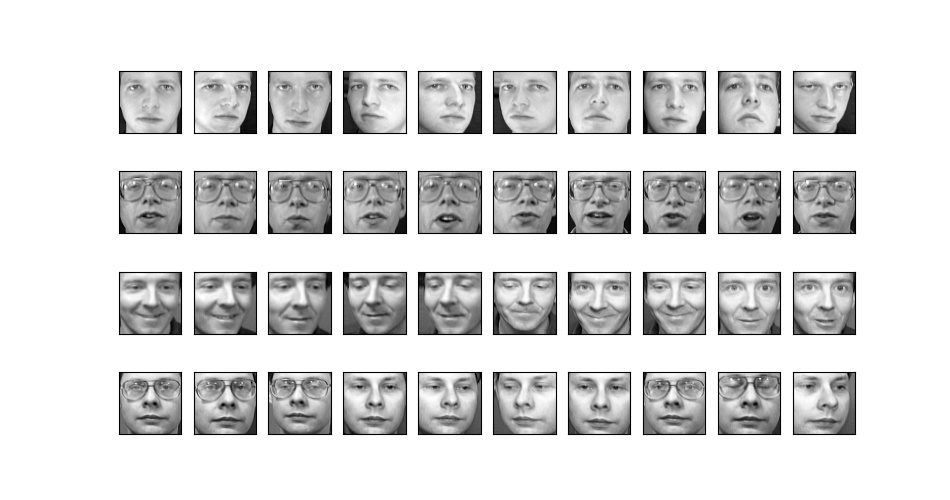

## The Approach
We represent each image as one long flattened vector. Our data set is composed of 64x64 images, thus, each image will be represented by a 4096 dimensional vector. We pack all of these vectors into a matrix such that each row represents one of the input images.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

c:\users\omer\appdata\local\programs\python\python38\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\users\omer\appdata\local\programs\python\python38\lib\site-packages\numpy\.libs\libopenblas.4SP5SUA7CBGXUEOC35YP2ASOICYYEQZZ.gfortran-win_amd64.dll
c:\users\omer\appdata\local\programs\python\python38\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
df = pd.read_csv('./olivetti_faces.csv')
df.head()

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,target
0,0.309917,0.367769,0.417355,0.442149,0.528926,0.607438,0.657025,0.677686,0.690083,0.685950,...,0.669422,0.652893,0.661157,0.475207,0.132231,0.148760,0.152893,0.161157,0.157025,0
1,0.454545,0.471074,0.512397,0.557851,0.595041,0.640496,0.681818,0.702479,0.710744,0.702479,...,0.157025,0.136364,0.148760,0.152893,0.152893,0.152893,0.152893,0.152893,0.152893,0
2,0.318182,0.400826,0.491736,0.528926,0.586777,0.657025,0.681818,0.685950,0.702479,0.698347,...,0.132231,0.181818,0.136364,0.128099,0.148760,0.144628,0.140496,0.148760,0.152893,0
3,0.198347,0.194215,0.194215,0.194215,0.190083,0.190083,0.243802,0.404959,0.483471,0.516529,...,0.636364,0.657025,0.685950,0.727273,0.743802,0.764463,0.752066,0.752066,0.739669,0
4,0.500000,0.545455,0.582645,0.623967,0.648760,0.690083,0.694215,0.714876,0.723140,0.731405,...,0.161157,0.177686,0.173554,0.177686,0.177686,0.177686,0.177686,0.173554,0.173554,0


### Displaying the images
We create a utility function displayImage(image_data) that takes a numpy array with the shape [4096] and displays it as a 64x64 image.

In [3]:
def displayImage(image_data):
    return plt.imshow((-1)*image_data.reshape((64,64)),cmap='Greys')

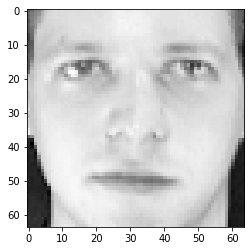

In [4]:
displayImage(df.iloc[0, :-1].to_numpy()) #  df.iloc[row, all columns but label column]

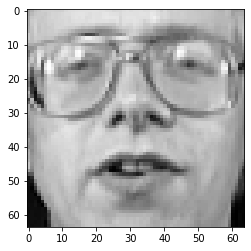

In [5]:
displayImage(df.iloc[10, :-1].to_numpy()) #  df.iloc[row, all columns but label column]

## Pre-Processing
When applying PCA, it's usually a good practice to make some data preprocessing, specifically feature scaling and normalizing. This is reasonable, as PCA deals with the variance of different features, which may differ significantly. In scikit-learn we make use of the preprocessing library to actually realize feature scaling and normalizing and the pipeline library to concatenate these actions in a process flow:

In [6]:
preprocessing = Pipeline([
    ('scaler', StandardScaler()),   # StandardScaler must be first
    ('normalizer', Normalizer()),
])

preprocessing.fit(df)
X = preprocessing.transform(df)

In [7]:
print('Means: ', X.mean(axis=0)[0:5]) # should be 0 before normalization
print('Standard deviations: ', X.std(axis=0)[0:5]) # should be 1 before normalization
print('Norms: ', np.sqrt(np.sum(X**2, axis=1))[0:5]) # should be 1

Means:  [0.00093888 0.00101676 0.00096452 0.00088188 0.00082727]
Standard deviations:  [0.01656978 0.01625678 0.01614278 0.01597071 0.01560338]
Norms:  [1. 1. 1. 1. 1.]


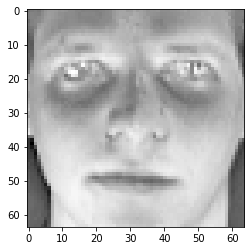

In [8]:
displayImage(X[0, :-1])

## Fitting
At this point we do PCA using scikit-learn decomposition library, assigning temporarily the number of components to 24 to better understand and visualize the concepts.


In scikit-learn PCA algorithm, the $k$ vectors which minimize the projection error are the first $k$ vectors $u^{(1)}, u^{(2)}, \ldots, u^{(k)}$ of the matrix $U$ obtained from the singular value decomposition of the matrix $\Sigma = \frac{1}{m} \sum_{i=1}^n (x_i)(x_i)^T$.

Singular value decomposition is a factorization of the form $M = U \varSigma V^{\ast}$, where $M$ is the $m \times n$ real or complex matrix to be decomposed, $U$ an $m \times m$ real or complex unitary matrix, $\varSigma$ an $m \times n$ rectangular diagonal matrix with non-negative real numbers on the diagonal, and $V^{\ast}$ an $n \times n$ real or complex unitary matrix. The diagonal entries $\sigma_i$ of $\varSigma$ are known as the singular values of $X$. The columns of $U$ are called left-singular vectors, while the columns of $V^{\ast}$ are called right-singular vectors.

In [9]:
pca = PCA(n_components=24)

pca.fit(X)

PCA(n_components=24)

In [10]:
U = pca.components_
U.shape

(24, 4097)

These vectors are linear combinations of the standard basis vectors and can be visualized as images, representing the coefficients as different gray intensities:

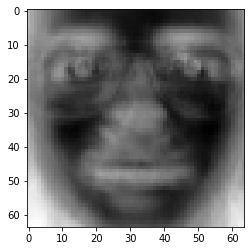

In [11]:
displayImage(U[0, :-1])

The projected (compressed) features are then given by:

In [12]:
Z = pca.transform(X)

While the reconstructed features from compressed representation $x_\text{approx} = U \,z $ are given by:

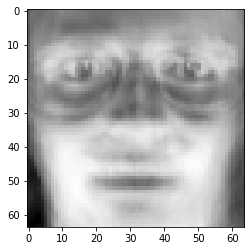

In [13]:
X_recover = pca.inverse_transform(Z)
displayImage(X_recover[0, :-1])

We can observe that with just 24 components, the faces are still recognizable, but to have a more rigorous method to evaluate our model, we consider the explained variance as a metric:

In [14]:
sum(pca.explained_variance_)

0.7682601853669695

We observe that the explained variance is pretty low, as we usually want to retain at least the 99% of the data variance. To get the desired variance explanation, we proceed manually by testing crescent values of the `n_components` parameter:

In [15]:
pca = PCA(n_components=50).fit(X)
print(sum(pca.explained_variance_))
pca = PCA(n_components=100).fit(X)
print(sum(pca.explained_variance_))
pca = PCA(n_components=200).fit(X)
print(sum(pca.explained_variance_))
pca = PCA(n_components=250).fit(X)
print(sum(pca.explained_variance_))
pca = PCA(n_components=260).fit(X)
print(sum(pca.explained_variance_))

0.8607713563986181
0.9282398595070647
0.9766351150867619
0.9874125809619653
0.9890309786199317


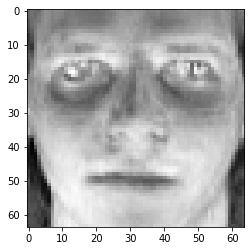

In [16]:
Z = pca.transform(X)
X_recover = pca.inverse_transform(Z)
displayImage(X_recover[0, :-1])

## Conclusion
In conclusion, with around 260 (of 4096) principal components the 99% of the variance in the data is retained.

In this, like in most real life scenarios, it's possible to highly compress data and still retain most of the variance. If we are not appying PCA as a preliminar step in a supervised machine learning problem, but we are in a more traditional analytical setting, the challenge at this point is in interpreting these vectors in order to get some insights on the data.

### References
1. [Principal Components Analysis on the Olivetti faces dataset](https://notebook.community/mana99/machine-playground/pca_svd-olivetti)
1. [github.com/jakeoeding/eigenfaces](https://github.com/jakeoeding/eigenfaces)